In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py

In [34]:
data = pd.read_csv('./data folder/ABMatchData(FULL).csv')
data.head(5)

,Opposition Name,Date,Result,Location,Opposition Debutants,Debutants,Opposition tries in last 5 games,Tries in last 5 games,Opposition Rating,Rating,Games since last loss
0,Canada,2003-10-17,62,Melbourne,0,1,9,28,65.62,89.80,8
1,Tonga,2003-10-24,84,Brisbane,1,1,13,31,70.08,89.80,9
2,Wales,2003-11-02,16,Sydney,0,0,17,37,76.92,89.80,10
3,South Africa,2003-11-08,20,Melbourne,0,0,28,44,81.84,89.80,11
4,Australia,2003-11-15,-12,Sydney,0,0,41,45,86.20,90.41,12


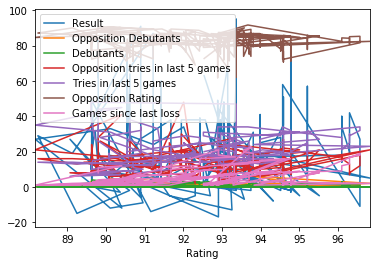

In [36]:
data.plot('Rating')